In [ ]:
"""You have to run flowers_init once before this code can be executed"""

In [1]:
import time
import numpy as np
import pandas as pd
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
#import matplotlib
import matplotlib.pyplot as plt
import pickle
#from sklearn.metrics import confusion_matrix
from keras.applications import InceptionV3
import os
from keras import optimizers
#import itertools
#from keras.optimizers import SGD, Adam, RMSprop, Nadam

import tensorflow as tf
import keras
from keras.callbacks import Callback
startTime = time.time()
threads = 12
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': threads}) 
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 1.00
sess = tf.Session(config=config) 
keras.backend.set_session(sess)
print("---------------------------------------------------------------")
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())
np.random.seed(1)

Using TensorFlow backend.


---------------------------------------------------------------
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5492124627554228277
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11811160064
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12794817567408445085
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:0a:00.0, compute capability: 6.1"
]


In [2]:
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
"""If you set this parameter to false the conv_base layers will not be trained.
This will reduce performance of the final model but reduces the computation time"""
conv_base.trainable = True #False
print("Done")

Done


In [3]:
train_images = pickle.load(open("train_images.pkl", "rb"))
val_images = pickle.load(open("val_images.pkl", "rb"))
test_images = pickle.load(open("test_images.pkl", "rb"))

In [4]:
base_dir = 'flowers_split'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
batch_size = 20

In [6]:
"""---"""

'---'

In [7]:
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 2593 images belonging to 5 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 865 images belonging to 5 classes.


In [10]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.ELU(alpha=1.0))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
print("Done")

Done


In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
print("Done")

Done


In [12]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=len(train_images)//batch_size,#100,
                              epochs=80,
                              validation_data=validation_generator,
                              validation_steps=(len(val_images)//batch_size),#50,
                              use_multiprocessing=False,
                              workers=int(threads/2)-1
                              )#verbose=0)

#use_multprocessing enables the cpu to do the data generator preprocessing on multiple cores before 
#the data is sent to the gpu. If this is not enabled it is possible that the cpu becomes the bottleneck and
#not the gpu.

Epoch 1/80
129/129 [==============================] - 32s 248ms/step - loss: 1.3866 - acc: 0.4601 - val_loss: 0.8639 - val_acc: 0.6849
Epoch 2/80
129/129 [==============================] - 15s 119ms/step - loss: 0.9632 - acc: 0.6389 - val_loss: 0.6690 - val_acc: 0.7609
Epoch 3/80
129/129 [==============================] - 15s 114ms/step - loss: 0.7803 - acc: 0.7046 - val_loss: 0.6637 - val_acc: 0.7787
Epoch 4/80
129/129 [==============================] - 15s 113ms/step - loss: 0.6850 - acc: 0.7542 - val_loss: 0.6349 - val_acc: 0.7929
Epoch 5/80
129/129 [==============================] - 15s 114ms/step - loss: 0.6299 - acc: 0.7785 - val_loss: 0.5771 - val_acc: 0.8201
Epoch 6/80
129/129 [==============================] - 15s 115ms/step - loss: 0.5568 - acc: 0.7912 - val_loss: 0.5867 - val_acc: 0.8189
Epoch 7/80
129/129 [==============================] - 15s 115ms/step - loss: 0.5425 - acc: 0.8027 - val_loss: 0.5590 - val_acc: 0.8249
Epoch 8/80
129/129 [==============================] - 1

129/129 [==============================] - 15s 114ms/step - loss: 0.0546 - acc: 0.9814 - val_loss: 0.7106 - val_acc: 0.8888
Epoch 62/80
129/129 [==============================] - 15s 114ms/step - loss: 0.0612 - acc: 0.9802 - val_loss: 0.6038 - val_acc: 0.9041
Epoch 63/80
129/129 [==============================] - 15s 114ms/step - loss: 0.0508 - acc: 0.9845 - val_loss: 0.6388 - val_acc: 0.9030
Epoch 64/80
129/129 [==============================] - 15s 114ms/step - loss: 0.0824 - acc: 0.9765 - val_loss: 0.6559 - val_acc: 0.8864
Epoch 65/80
129/129 [==============================] - 15s 114ms/step - loss: 0.0653 - acc: 0.9837 - val_loss: 0.6823 - val_acc: 0.8888
Epoch 66/80
129/129 [==============================] - 15s 115ms/step - loss: 0.0741 - acc: 0.9729 - val_loss: 0.5289 - val_acc: 0.9018
Epoch 67/80
129/129 [==============================] - 15s 115ms/step - loss: 0.0692 - acc: 0.9779 - val_loss: 0.6106 - val_acc: 0.9006
Epoch 68/80
129/129 [==============================] - 15s 1

In [13]:
#model.save('flowers2.h5')

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
print("Done")

Done


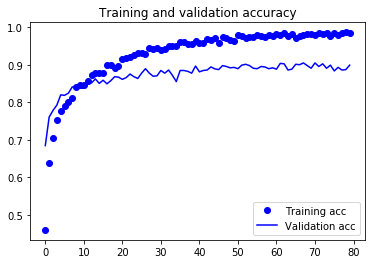

In [15]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
#plt.savefig('pretrained_image_gen_train_acc.png', bbox_inches='tight')

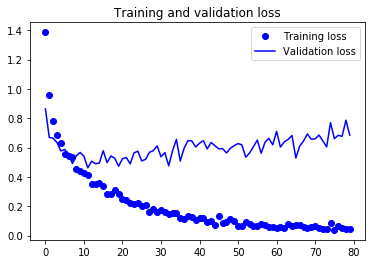

In [16]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
#plt.savefig('pretrained_image_gen_train_val.png', bbox_inches='tight')
plt.show()

In [17]:
"""TEST SET"""

'TEST SET'

In [18]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=500)
print('test acc:', test_acc)

Found 865 images belonging to 5 classes.
test acc: 0.9080833707536969


In [19]:
test_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=batch_size,
                                                        shuffle=False,
                                                        class_mode='categorical')

Found 865 images belonging to 5 classes.


In [20]:
pred_result = model.predict_generator(test_generator,
                                      steps=len(test_images)//batch_size,
                                      verbose=0)

In [21]:
def create_list(arr_arr):
    new_arr = []
    for x in arr_arr:
        index = 0
        for i in x:
            if i > 0:
                new_arr.append(index)
                break
            index += 1
    return new_arr

In [22]:
labels=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
labels_d={'daisy':0, 'dandelion':1, 'rose':2, 'sunflower':3, 'tulip':4}
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        shuffle=False,
        class_mode='categorical')
correct_result = []
count = 0
leng = len(pred_result)/batch_size
print(leng)
for x, y in test_generator:
    correct_result.extend(create_list(y))
    count+=1
    if count > leng: #leng
        break

Found 865 images belonging to 5 classes.
43.0


In [23]:
df = pd.DataFrame(np.zeros((5, 5)),index=labels , columns=labels)

In [24]:
indexOfErrors = []
for i in range(0, len(pred_result[:,0])): 
        maxV = 0
        j = 0
        
        for j in range(0, len(pred_result[0,:])):
            if pred_result[i,j] > maxV:
                maxV = pred_result[i,j]
                maxIndex = j
        if maxIndex != correct_result[i]:
            indexOfErrors.append(i)
        df.iloc[maxIndex,correct_result[i]] +=1
print("confusion matrix: rows are predictions, columns are the correct answers")
print("confusion matrix:")
print(df)

confusion matrix: rows are predictions, columns are the correct answers
confusion matrix:
           daisy  dandelion   rose  sunflower  tulip
daisy      113.0       36.0    4.0        1.0    3.0
dandelion    5.0      171.0   24.0        2.0    1.0
rose         0.0        1.0  102.0       29.0   10.0
sunflower    5.0        4.0    3.0      122.0    8.0
tulip        4.0        9.0   22.0        4.0  177.0


In [25]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 865 images belonging to 5 classes.


In [26]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.9045685196891049


In [27]:
endTime = time.time()
print(endTime - startTime)

1394.6620981693268
